# Pendahuluan

## Latar Belakang
Pada era persaingan bisnis yang semakin ketat, perusahaan harus mampu memahami dan menjangkau pelanggan dengan lebih baik. Pelanggan yang puas akan cenderung membeli kembali dan merekomendasikan produk atau layanan perusahaan kepada orang lain. Menurut LinovHR (2007), pelanggan yang suka terhadap jasa atau produk memiliki kemungkinan yang besar untuk kembali membeli produk atau jasa. Bahkan jika mereka loyal, mereka bisa merekomendasikan produk atau jasa dari perusahaan kepada orang lain tanpa disuruh. Oleh karena itu, perusahaan butuh suatu metode untuk membantu perusahaan dalam memahami kebutuhan, preferensi, dan perilaku pelanggan.

Hal tersebut dapat dilakukan dengan segmentasi pelanggan. Segmentasi pelanggan dapat didefinisikan sebagai pembagian pelanggan menjadi kelompok-kelompok pelanggan yang berbeda, dengan kebutuhan, karakteristik, atau perilaku yang berbeda, yang mungkin memerlukan produk yang berbeda atau yang mungkin merespons secara berbeda terhadap berbagai kombinasi upaya pemasaran (Kotler & Armstrong, 1999). Beberapa basis segmentasi yang dapat digunakan termasuk geografis, demografis, psikografis, dan perilaku. Variabel lain yang dapat digunakan untuk segmentasi meliputi situasional misalnya, kesempatan pembelian/penggunaan, dan preferensi pelanggan untuk produk atau tingkat atribut produk yang spesifik (Cooil, Aksoy, & Keiningham, 2008).

## Tujuan Clustering

Tujuan dibuatnya notebook ini adalah untuk melakukan clustering terhadap data mall customer. Pembangunan model dilakukan dengan beberapa algoritma. Algoritma tersebut yaitu K-Means, DBSCAN, dan Affinity Propagation. Setelah itu, dilakukan perbandingan algoritma yang paling baik untuk digunakan pada data mall customer.

# Pre-Processing Data

## Import Library

Pada tahap ini, kita akan mengimport library yang akan digunakan dalam pembangunan model. Library yang digunakan adalah pandas, matplotlib, dan seaborn. Library pandas digunakan untuk membaca data dan mengolah data. Library matplotlib dan seaborn digunakan untuk melakukan visualisasi data.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

## Membaca Data

### Dataset yang digunakan
Dataset yang akan digunakan untuk melakukan customer segmentation menggunakan K-Means Clustering diperoleh dari kartu keanggotaan yang dimiliki oleh pelanggan di sebuah mall. Informasi dasar seperti usia, jenis kelamin, maupun pendapatan didapatkan saat pelanggan mendaftar kartu keanggotaan. Atribut-atribut yang ada pada data ini berupa Customer ID, age, gender, annual income, dan spending score.

In [81]:
customers = pd.read_csv('data/data.csv')
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Renaming Attributes
Pada cell berikut bertujuan untuk mengubah nama kolom agar mempermudah dalam pemanggilan data di tahap selanjutnya.

In [82]:
# rename column Annual Income (k$) to AnnualIncome
customers.rename(columns={'Annual Income (k$)': 'AnnualIncome'}, inplace=True)

# rename column Spending Score (1-100) to SpendingScore
customers.rename(columns={'Spending Score (1-100)': 'SpendingScore'}, inplace=True)

customers

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Replacing Missing Values

Karena tidak ada missing values pada dataset, maka tidak perlu dilakukan proses replace missing values. Terlihat pada output berikut yang menunjukan bahwa tidak ada missing values pada dataset.

In [83]:
customers.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

# Exploratory Data Analysis

## Descriptive Statistics

Pertama, kita akan melihat beberapa statistik deskriptif dari data yang akan digunakan. Berikut adalah beberapa statistik deskriptif yang akan kita lihat.

In [84]:
customers.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Distribusi Data

### Categorical Data

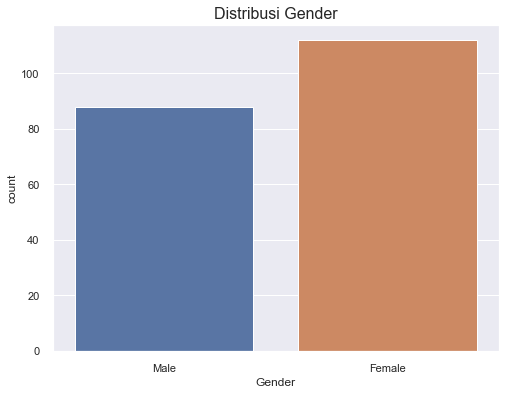

In [85]:
fig = plt.figure(figsize=(8, 6))

sns.countplot(data=customers, x='Gender')

plt.title('Distribusi Gender', fontsize=16)
plt.show()

### Numerical Data

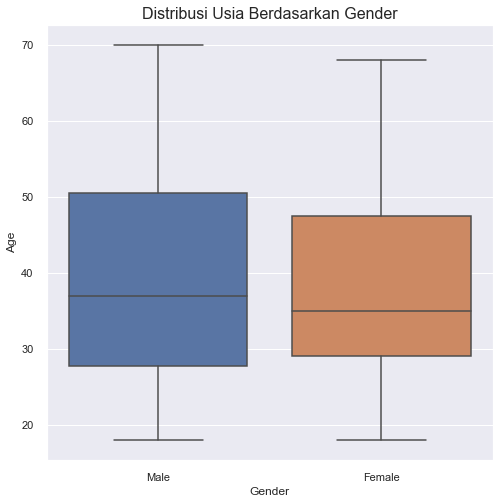

In [86]:
fig = plt.figure(figsize=(8, 8))

sns.boxplot(data=customers, x='Gender', y='Age')

plt.title('Distribusi Usia Berdasarkan Gender', fontsize=16)
plt.show()

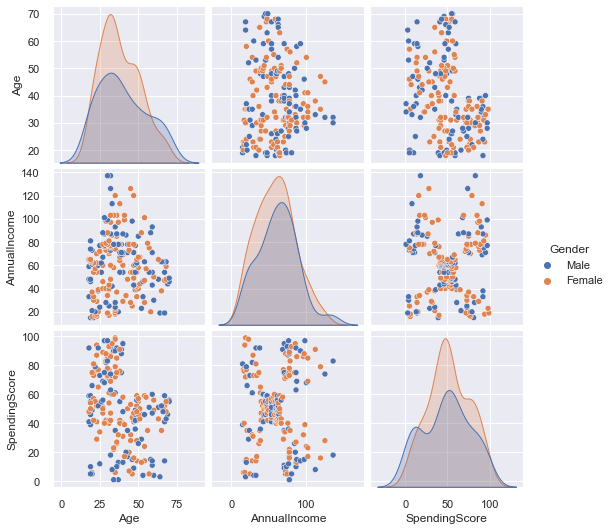

In [87]:
sns.pairplot(
    data=customers, 
    x_vars=['Age', 'AnnualIncome', 'SpendingScore'], 
    y_vars=['Age', 'AnnualIncome', 'SpendingScore'],
    hue='Gender',
)

plt.show()

# Clustering

## Menggunakan K-Means

### Import Library

In [88]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

### Menentukan K Optimal

#### Menggunakan Elbow Method

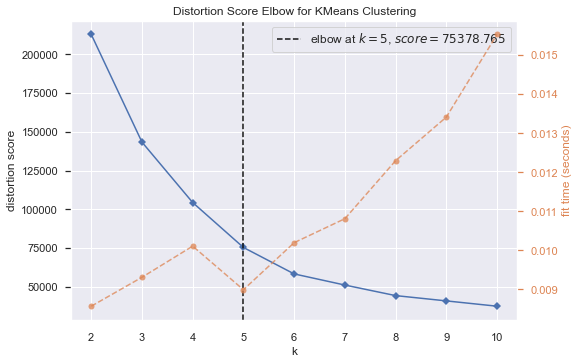

In [89]:
model = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model)

visualizer.fit(customers[['Age', 'AnnualIncome', 'SpendingScore']])
visualizer.show()
plt.show()

#### Menggunakan Silhouette Score

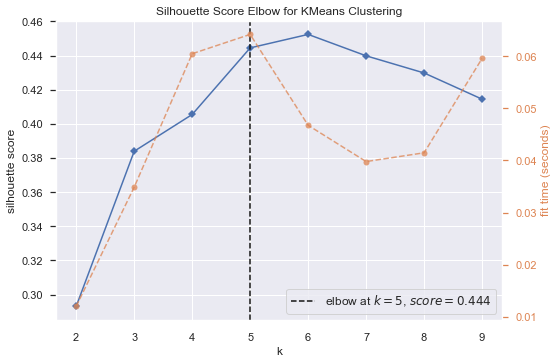

In [90]:
model = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(customers[['Age', 'AnnualIncome', 'SpendingScore']])
visualizer.show()
plt.show()

### Pembangunan Model

In [91]:
model = KMeans(n_clusters=5, random_state=42)

model.fit(customers[['Age', 'AnnualIncome', 'SpendingScore']])

customers['cluster'] = model.labels_

/Users/heritsam/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualisasi Hasil

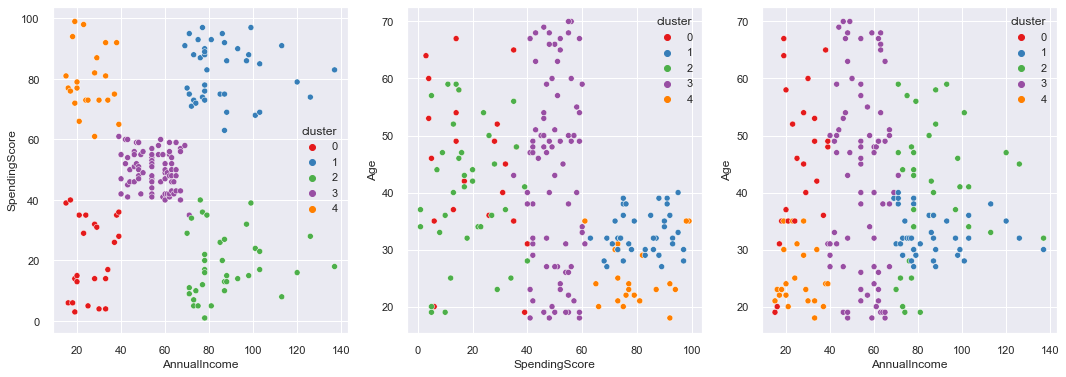

In [92]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=customers, x='AnnualIncome', y='SpendingScore', hue='cluster', palette='Set1', ax=ax[0])
sns.scatterplot(data=customers, x='SpendingScore', y='Age', hue='cluster', palette='Set1', ax=ax[1])
sns.scatterplot(data=customers, x='AnnualIncome', y='Age', hue='cluster', palette='Set1', ax=ax[2])

plt.show()

## Menggunakan DBScan

### Import Library

In [93]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

In [94]:
eps_values = np.arange(8, 12.75, 0.25) # eps values to be investigated
min_samples = np.arange(3, 10) # min_samples values to be investigated

# create a list of all combinations of eps and min_samples
parameters = list(product(eps_values, min_samples))

### Mencari Nilai Epsilon dan MinPts yang Optimal

In [95]:
no_of_clusters = []
sil_score = []

for p in parameters:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(customers[['Age', 'AnnualIncome', 'SpendingScore']])
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(customers[['Age', 'AnnualIncome', 'SpendingScore']], DBS_clustering.labels_))

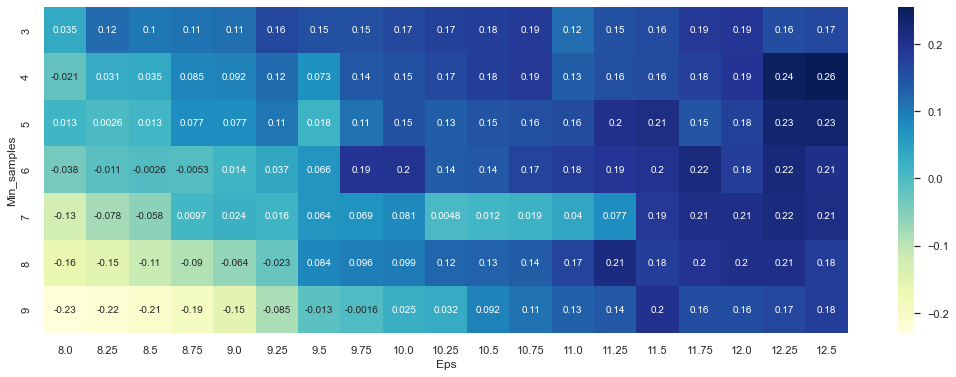

In [96]:
tmp = pd.DataFrame.from_records(parameters, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global optimum dari nilai `epsilon` adalah 12.5 dan nilai `min_samples` nya 4.

### Pembangunan Model

In [97]:
model = DBSCAN(eps=12.5, min_samples=4)

model.fit(customers[['Age', 'AnnualIncome', 'SpendingScore']])

customers['cluster_dbscan'] = DBS_clustering.labels_

### Visualisasi Hasil

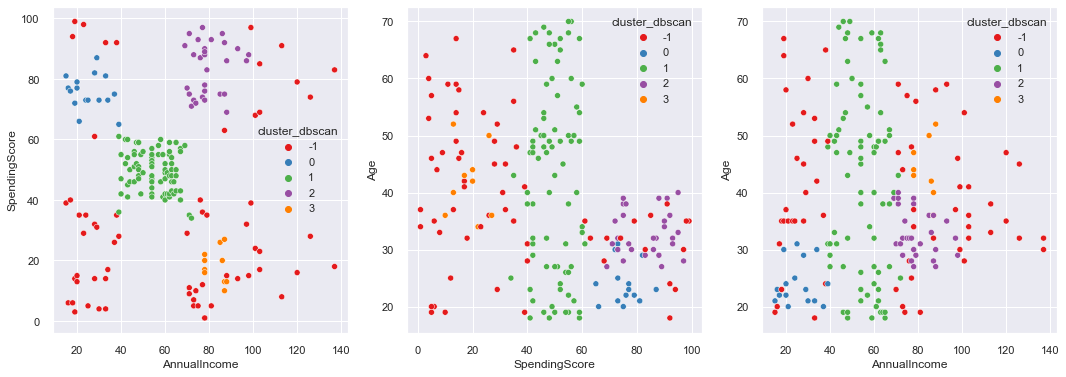

In [98]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=customers, x='AnnualIncome', y='SpendingScore', hue='cluster_dbscan', palette='Set1', ax=ax[0])
sns.scatterplot(data=customers, x='SpendingScore', y='Age', hue='cluster_dbscan', palette='Set1', ax=ax[1])
sns.scatterplot(data=customers, x='AnnualIncome', y='Age', hue='cluster_dbscan', palette='Set1', ax=ax[2])

plt.show()

## Menggunakan Affinity Propagation

### Import Library

In [99]:
from sklearn.cluster import AffinityPropagation

### Mencari Nilai Preference yang Optimal

In [100]:
no_of_clusters = []
preferences = range(-20000,-5000,100)
af_sil_score = []

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(customers[['Age', 'AnnualIncome', 'SpendingScore']])
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(customers[['Age', 'AnnualIncome', 'SpendingScore']], AF.labels_))
    
af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head()

/Users/heritsam/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


,preference,clusters,sil_score
82,-11800.0,6.0,0.451649
27,-17300.0,6.0,0.451491
51,-14900.0,6.0,0.451491
52,-14800.0,6.0,0.451440
28,-17200.0,6.0,0.451440


### Pembangunan Model

In [101]:
model = AffinityPropagation(preference=-11800)

model.fit(customers[['Age', 'AnnualIncome', 'SpendingScore']])

customers['cluster_affinity'] = model.labels_

### Visualisasi Hasil

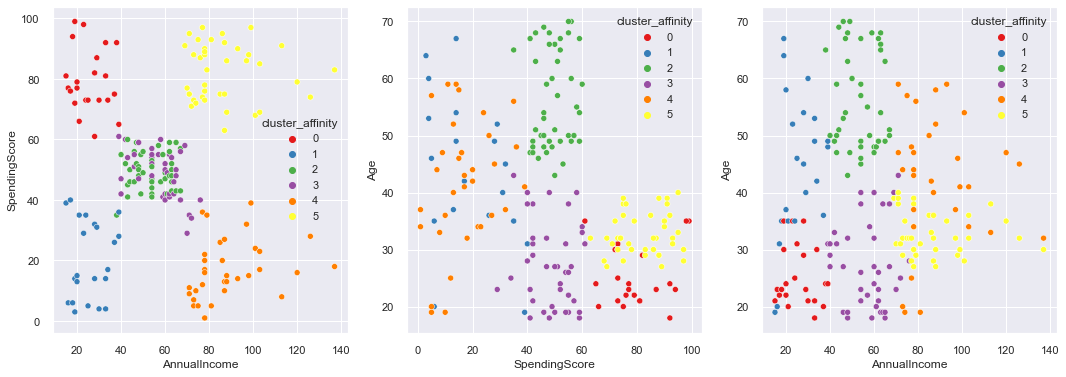

In [102]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=customers, x='AnnualIncome', y='SpendingScore', hue='cluster_affinity', palette='Set1', ax=ax[0])
sns.scatterplot(data=customers, x='SpendingScore', y='Age', hue='cluster_affinity', palette='Set1', ax=ax[1])
sns.scatterplot(data=customers, x='AnnualIncome', y='Age', hue='cluster_affinity', palette='Set1', ax=ax[2])

plt.show()

# Membandingkan Hasil Clustering

## Visualisasi

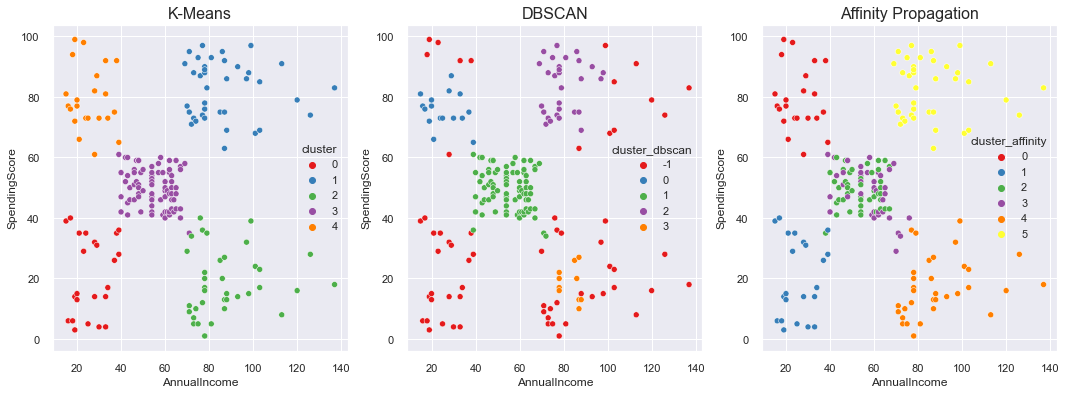

In [107]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=customers, x='AnnualIncome', y='SpendingScore', hue='cluster', palette='Set1', ax=ax[0])
sns.scatterplot(data=customers, x='AnnualIncome', y='SpendingScore', hue='cluster_dbscan', palette='Set1', ax=ax[1])
sns.scatterplot(data=customers, x='AnnualIncome', y='SpendingScore', hue='cluster_affinity', palette='Set1', ax=ax[2])

ax[0].set_title('K-Means', fontsize=16)
ax[1].set_title('DBSCAN', fontsize=16)
ax[2].set_title('Affinity Propagation', fontsize=16)

plt.show()

# Daftar Pustaka

Kotler, P., & Armstrong, G. (1999). Principles of Marketing. London: Prentice Hall. Cooil, B., Aksoy, L., & Keiningham, T. L. (2008). Approaches to Customer Segmentation. Journal of Relationship Marketing.

LinovHR. (2020, September 7). Kepuasan Pelanggan: Pengertian, Manfaat, dan Cara Meningkatkannya. Retrieved from Payroll, ESS, and Talent Management: https://www.linovhr.com/kepuasan-pelanggan/

# Lampiran
## Lampiran Program
Notebook ini dapat diakses pada link https://github.com/Heritsam/clustering-customer-segmentation.